In [2]:
import os
import pandas as pd

## Merging the data into one csv

In [4]:
path = r'C:\Users\mdabr\OneDrive\DATA ANALYTICS\Portfolio\Sales Data Project\Sales_Data'
files = [file for file in os.listdir(path)]

all_months = pd.DataFrame()

for file in files:
    df = pd.read_csv(path+"/"+file)
    all_months = pd.concat([all_months, df])
    
all_months.to_csv("all_data.csv", index=False)

In [5]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Cleaning up the data

#### dropping NaN rows

In [9]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### finding rows that duplicate column name and removing them

In [14]:
temp_df = all_data[all_data['Order Date'].str[:2] == 'Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [15]:
all_data = all_data[all_data['Order Date'].str[:2] != 'Or']

#### converting column types

In [19]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

## Adding new columns

#### month 

In [16]:
all_data['Month'] = all_data['Order Date'].str[:2].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### sales

In [20]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### city

In [45]:
def city(address):
    return address.split(',')[1]

def state(address):
    return address.split(',')[2][:3].lstrip()

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{city(x)}, {state(x)}")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"


# Data Exploration

#### Best month for sales

In [21]:
all_data.groupby('Month').sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


In [22]:
all_data.groupby('Month').sum().sort_values('Sales', ascending=False)

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114,4.588415e+06,4.613443e+06
10,22703,3.715555e+06,3.736727e+06
4,20558,3.367671e+06,3.390670e+06
11,19798,3.180601e+06,3.199603e+06
5,18667,3.135125e+06,3.152607e+06
3,17005,2.791208e+06,2.807100e+06
7,16072,2.632540e+06,2.647776e+06
6,15253,2.562026e+06,2.577802e+06
8,13448,2.230345e+06,2.244468e+06


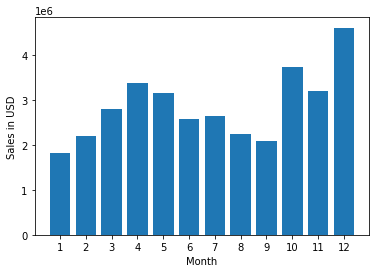

In [24]:
import matplotlib.pyplot as plt

month = range(1,13)
results = all_data.groupby('Month').sum()

plt.bar(month, results['Sales'])
plt.xticks(month)
plt.ylabel('Sales in USD')
plt.xlabel('Month')

plt.show()

#### City with the most sales

In [47]:
all_data.groupby('City').sum()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
"Atlanta, GA",16602,2.779908e+06,104794,2.795499e+06
"Austin, TX",11153,1.809874e+06,69829,1.819582e+06
"Boston, MA",22528,3.637410e+06,141112,3.661642e+06
"Dallas, TX",16730,2.752628e+06,104620,2.767975e+06
"Los Angeles, CA",33289,5.421435e+06,208325,5.452571e+06
"New York City, NY",27932,4.635371e+06,175741,4.664317e+06
"Portland, ME",2750,4.471893e+05,17144,4.497583e+05
"Portland, OR",11303,1.860558e+06,70621,1.870732e+06
"San Francisco, CA",50239,8.211462e+06,315520,8.262204e+06


In [48]:
all_data.groupby('City').sum().sort_values('Sales', ascending=False)

,Quantity Ordered,Price Each,Month,Sales
City,,,,
"San Francisco, CA",50239,8.211462e+06,315520,8.262204e+06
"Los Angeles, CA",33289,5.421435e+06,208325,5.452571e+06
"New York City, NY",27932,4.635371e+06,175741,4.664317e+06
"Boston, MA",22528,3.637410e+06,141112,3.661642e+06
"Atlanta, GA",16602,2.779908e+06,104794,2.795499e+06
"Dallas, TX",16730,2.752628e+06,104620,2.767975e+06
"Seattle, WA",16553,2.733296e+06,104941,2.747755e+06
"Portland, OR",11303,1.860558e+06,70621,1.870732e+06
"Austin, TX",11153,1.809874e+06,69829,1.819582e+06


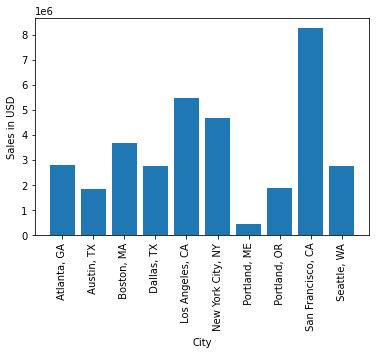

In [73]:
cities = [city for city, df in all_data.groupby('City')]
results = all_data.groupby('City').sum()

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical')
plt.ylabel('Sales in USD')
plt.xlabel('City')

plt.show()

#### Best time to advertise products

In [74]:
all_data['Order Date dt'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Date dt
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX",2019-04-19 08:46:00
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA",2019-04-07 22:30:00
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",2019-04-12 14:38:00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",2019-04-12 14:38:00
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",2019-04-30 09:27:00


In [75]:
all_data['Hour'] = all_data['Order Date dt'].dt.hour
all_data['Minute'] = all_data['Order Date dt'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Date dt,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX",2019-04-19 08:46:00,8,46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA",2019-04-07 22:30:00,22,30
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",2019-04-12 14:38:00,14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",2019-04-12 14:38:00,14,38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",2019-04-30 09:27:00,9,27


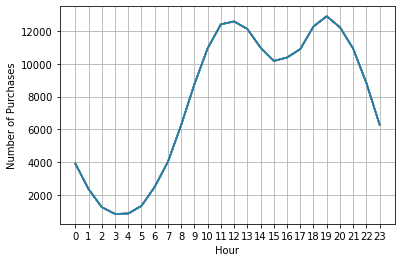

In [79]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby('Hour').count())
plt.xticks(hours)
plt.grid()
plt.ylabel('Number of Purchases')
plt.xlabel('Hour')


plt.show()

#### Products most often sold together

In [81]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Date dt,Hour,Minute
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",2019-04-12 14:38:00,14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",2019-04-12 14:38:00,14,38
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",2019-04-03 19:42:00,19,42
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,"Los Angeles, CA",2019-04-03 19:42:00,19,42
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,"Boston, MA",2019-04-07 11:31:00,11,31
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,"Boston, MA",2019-04-07 11:31:00,11,31
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,"San Francisco, CA",2019-04-10 17:00:00,17,0
33,176586,Google Phone,1,600.00,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,600.00,"San Francisco, CA",2019-04-10 17:00:00,17,0
119,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,14.95,"New York City, NY",2019-04-12 11:07:00,11,7
120,176672,USB-C Charging Cable,1,11.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,11.95,"New York City, NY",2019-04-12 11:07:00,11,7


In [84]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()

<ipython-input-84-08052029033e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [86]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Most sold product

In [87]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Date dt,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX",2019-04-19 08:46:00,8,46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA",2019-04-07 22:30:00,22,30
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",2019-04-12 14:38:00,14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",2019-04-12 14:38:00,14,38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",2019-04-30 09:27:00,9,27


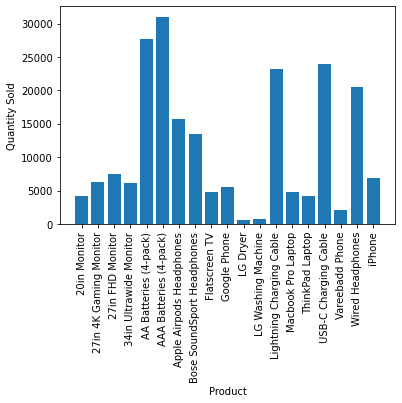

In [93]:
product_type = all_data.groupby('Product')
quantity_ordered = product_type.sum()['Quantity Ordered']

products = [product for product, df in product_type]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical')
plt.ylabel('Quantity Sold')
plt.xlabel('Product')

plt.show()

In [94]:
#hypothesis: the most sold items are cheaper than the ones sold in lower quantities

<ipython-input-108-8d7d38cf7e33>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


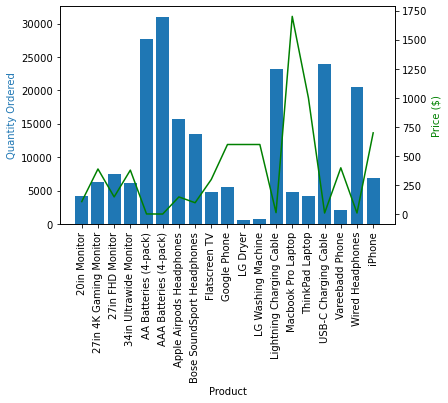

In [108]:
#copied from stackoverflow
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered)
ax2.plot(products, prices, color='g')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='tab:blue')
ax2.set_ylabel('Price ($)', color='g')
ax1.set_xticklabels(products, rotation='vertical')

fig.show()